<a href="https://colab.research.google.com/github/purnawanpp/chem_ir/blob/main/chem_ir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCA Analysis**

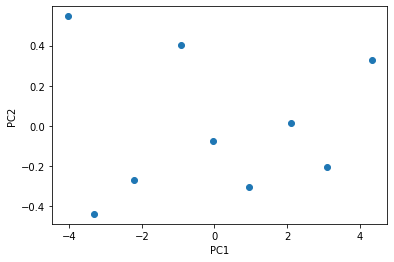

In [1]:
# Import libraries
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data
url = 'https://github.com/purnawanpp/1ODX/raw/main/data.csv' # Ubah dengan link file IR_spectrum.csv Anda
data = pd.read_csv(url)

# Clean data (optional)
# ...

# Normalize data
data_normalized = (data['Intensity'] - data['Intensity'].mean()) / data['Intensity'].std()

# Combine data
data_combined = pd.concat([data['Wavenumber (cm-1)'], data_normalized], axis=1)

# Perform PCA analysis
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_combined)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

# Visualize results
plt.scatter(principalDf['PC1'], principalDf['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


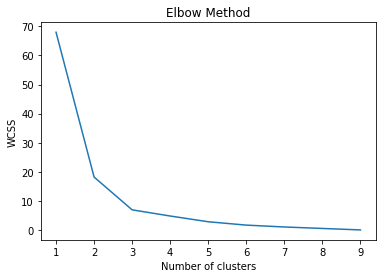

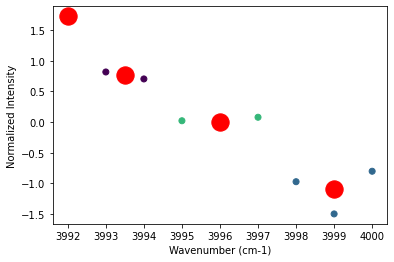

In [4]:
# Import libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data
url = 'https://github.com/purnawanpp/1ODX/raw/main/data.csv' # Ubah dengan link file IR_spectrum.csv Anda
data = pd.read_csv(url)

# Clean data (optional)
# ...

# Normalize data
data_normalized = (data['Intensity'] - data['Intensity'].mean()) / data['Intensity'].std()

# Combine data
data_combined = pd.concat([data['Wavenumber (cm-1)'], data_normalized], axis=1)

# Determine optimal number of clusters using elbow method
wcss = []
for i in range(1, len(data_combined)+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_combined)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, len(data_combined)+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_combined)

# Visualize results
plt.scatter(data_combined.iloc[:,0], data_combined.iloc[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('Wavenumber (cm-1)')
plt.ylabel('Normalized Intensity')
plt.show()


**PLS (partial least squares)**

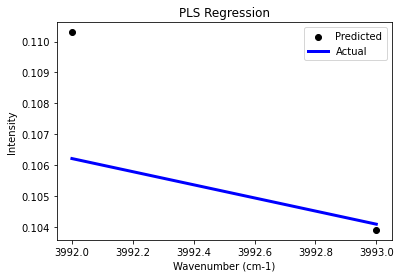

R2 score: 0.18179944096779166


In [9]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt

# Load data
url = 'https://github.com/purnawanpp/1ODX/raw/main/data.csv' # Ubah dengan link file IR_spectrum.csv Anda
data = pd.read_csv(url)

# Split data into X and y
X = data['Wavenumber (cm-1)'].values.reshape(-1, 1)
y = data['Intensity'].values

# Split data into training and test sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train PLS model
pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

# Predict on test data
y_pred = pls.predict(X_test)

# Calculate R2 score
r2 = pls.score(X_test, y_test)

# Plot predicted vs actual values
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Wavenumber (cm-1)')
plt.ylabel('Intensity')
plt.title('PLS Regression')
plt.legend(['Predicted', 'Actual'])
plt.show()

# Print results
print(f"R2 score: {r2}")


**Discriminant analysis**

In [19]:
import pandas as pd

# Load data
url = 'https://github.com/purnawanpp/1ODX/raw/main/data.csv' # Ubah dengan link file IR_spectrum.csv Anda
df = pd.read_csv(url)

# Print first few rows of data frame
print(df.head())


   Wavenumber_(cm-1)  Intensity
0               4000     0.0925
1               3999     0.0876
2               3998     0.0913
3               3997     0.0987
4               3996     0.0976
